In [1]:
import os, shutil,random
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import skimage.segmentation
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    classification_report
)

In [2]:
train_directory = "D:\\projects\\deepfake detection\\Dataset\\Train"
val_directory = "D:\\projects\\deepfake detection\\Dataset\\val"
test_directory = "D:\\projects\\deepfake detection\\Dataset\\test"

In [3]:
import tensorflow as tf
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers  import L2, L1
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [4]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE":224,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 5,
    "DROPOUT_RATE": 0.05,
    "REGULARIZATION_RATE": 0.001,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 2,
    "PATCH_SIZE": 32,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["Fake","Real"]
}

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True
)

Found 9690 files belonging to 2 classes.


In [6]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 1620 files belonging to 2 classes.


In [7]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 4165 files belonging to 2 classes.


In [8]:
Real=os.listdir('D:\projects\deepfake detection\Dataset\Train\Real')
Real_dir='D:\projects\deepfake detection\Dataset\Train\Real'

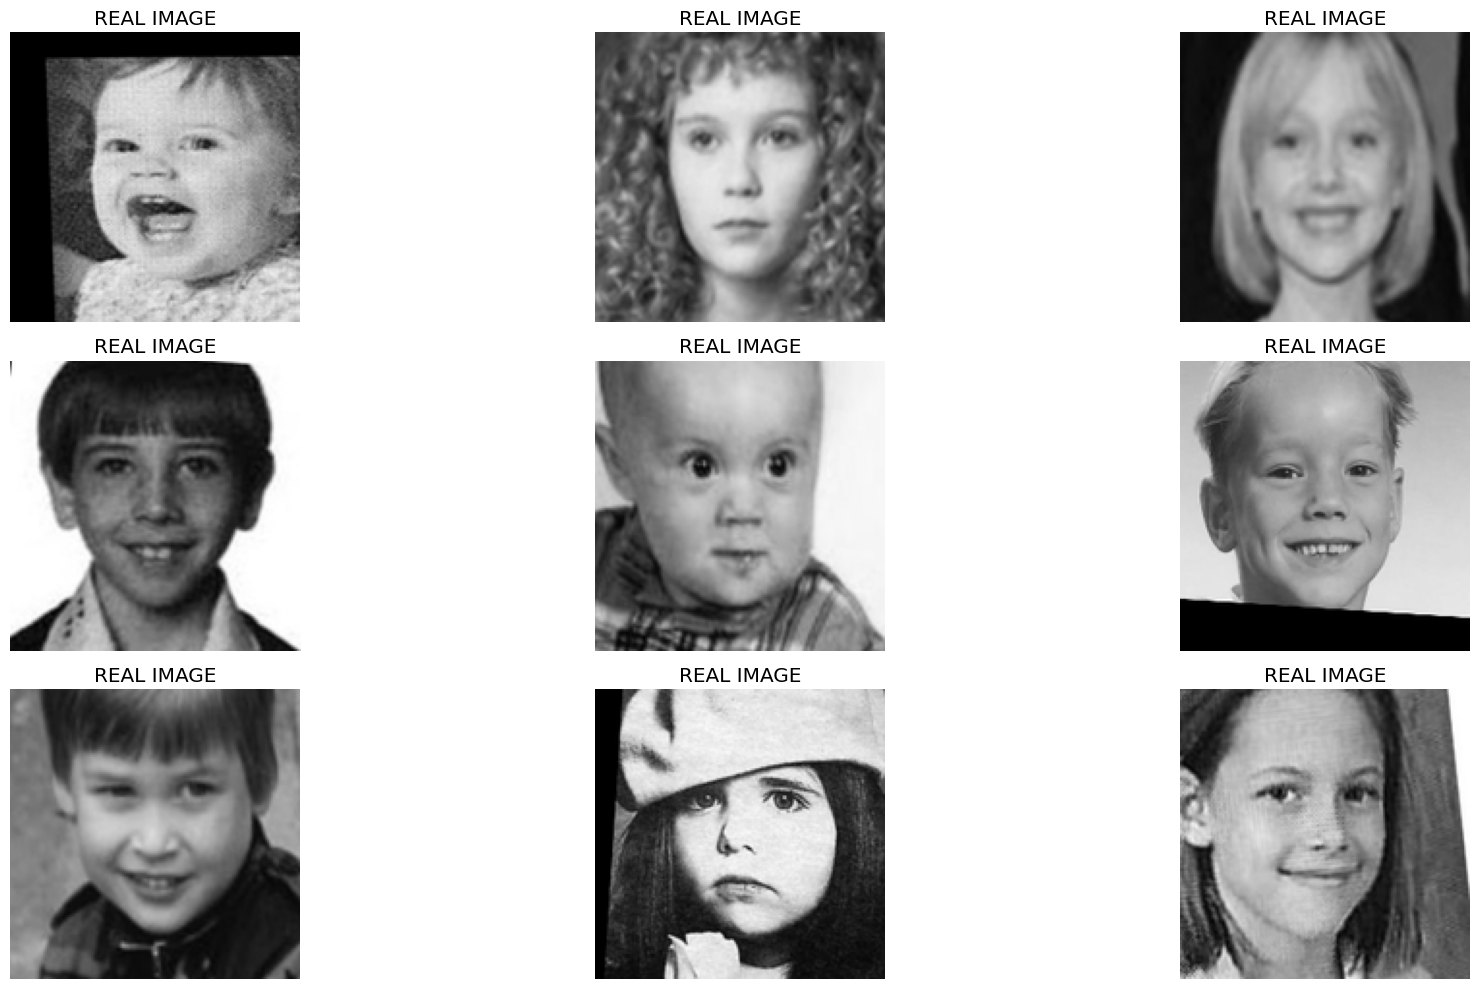

In [9]:
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img=plt.imread(os.path.join(Real_dir,Real[i]))
    plt.imshow(img , cmap='gray')
    plt.axis("off")
    plt.title("REAL IMAGE")
plt.tight_layout()
    

In [10]:
Fake=os.listdir('D:\projects\deepfake detection\Dataset\Train\Fake')
Fake_dir='D:\projects\deepfake detection\Dataset\Train\Fake'

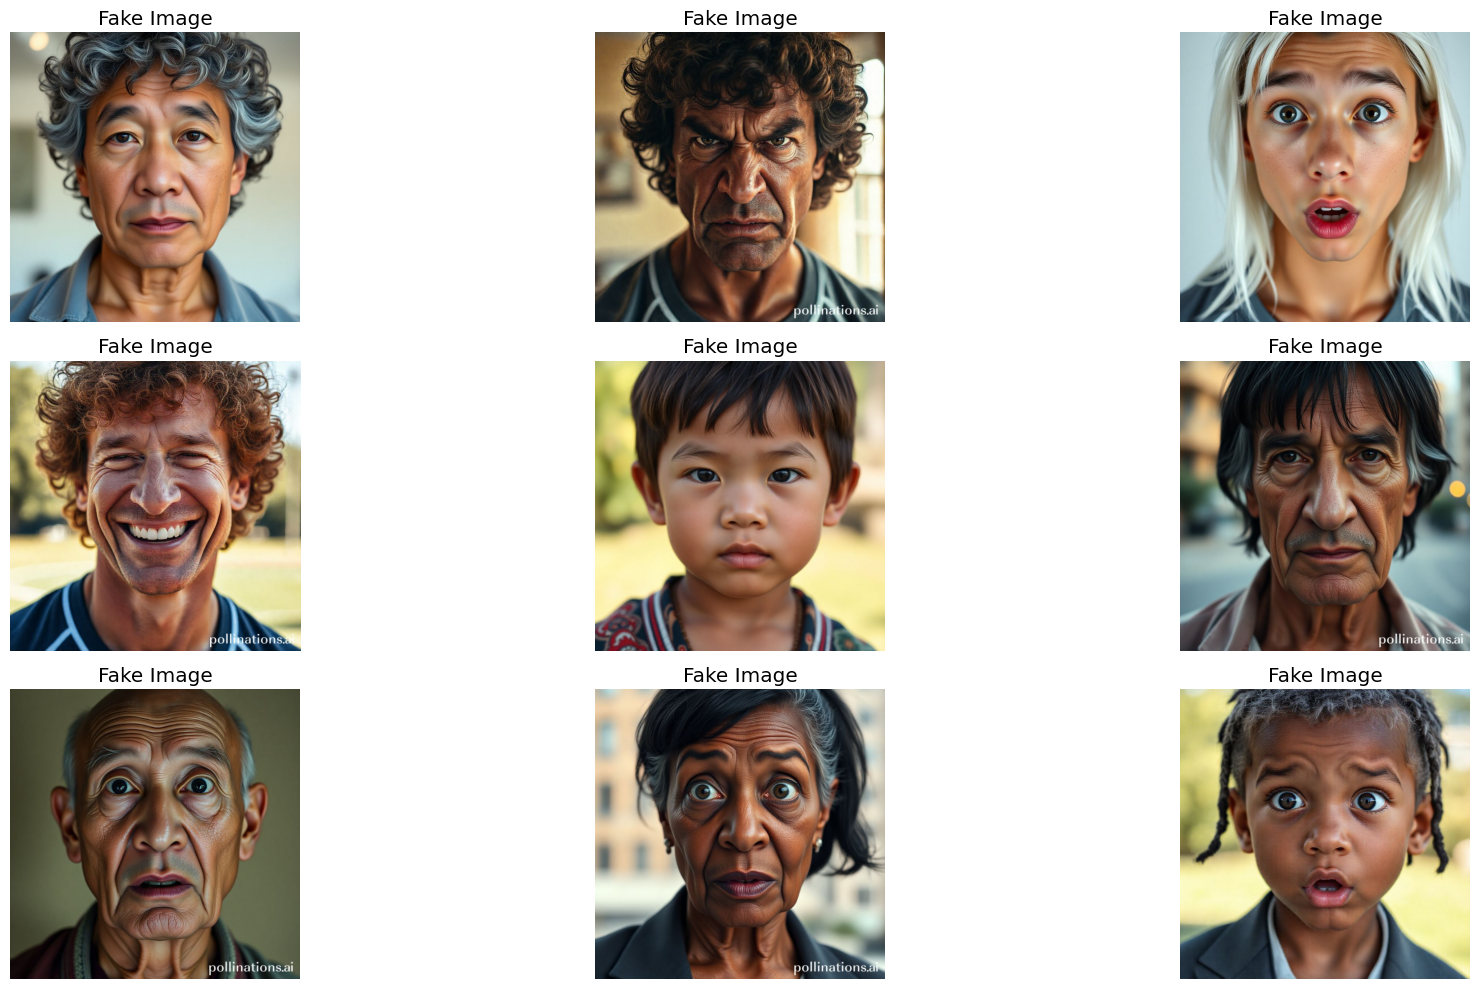

In [11]:
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img=plt.imread(os.path.join(Fake_dir,Fake[i]))
    plt.imshow(img , cmap='gray')
    plt.axis("off")
    plt.title("Fake Image")
plt.tight_layout()

In [12]:
training_dataset = (
    train_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [13]:
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [14]:
input_shape = (224, 224, 3)
# Load the EfficientNetB0 model, excluding the top layers (include_top=False)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
# Freeze the base model
base_model.trainable = False

# Create a Sequential model and add layers
model = models.Sequential()

# Add the EfficientNet base model
model.add(base_model)

# Add a global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dropout layer for regularization
model.add(layers.Dropout(0.5))

# Add a dense layer with softmax activation for classification
model.add(layers.Dense(CONFIGURATION["NUM_CLASSES"], activation = "sigmoid"))

In [15]:
loss_function = BinaryCrossentropy()

In [16]:
model.compile(
  optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]),
  loss = loss_function,metrics=['accuracy']
)

In [17]:
history =model.fit(
  training_dataset,
  validation_data = validation_dataset,
  batch_size= CONFIGURATION["BATCH_SIZE"],

  epochs = CONFIGURATION["N_EPOCHS"],
  verbose = 1
)

Epoch 1/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 541s 2s/step - accuracy: 0.6795 - loss: 0.6006 - val_accuracy: 0.3623 - val_loss: 1.3597
Epoch 2/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.7776 - loss: 0.4625 - val_accuracy: 0.3722 - val_loss: 1.6146
Epoch 3/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.7878 - loss: 0.4415 - val_accuracy: 0.3457 - val_loss: 1.7561
Epoch 4/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.7908 - loss: 0.4328 - val_accuracy: 0.3685 - val_loss: 1.8320
Epoch 5/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.7993 - loss: 0.4240 - val_accuracy: 0.3722 - val_loss: 1.8468


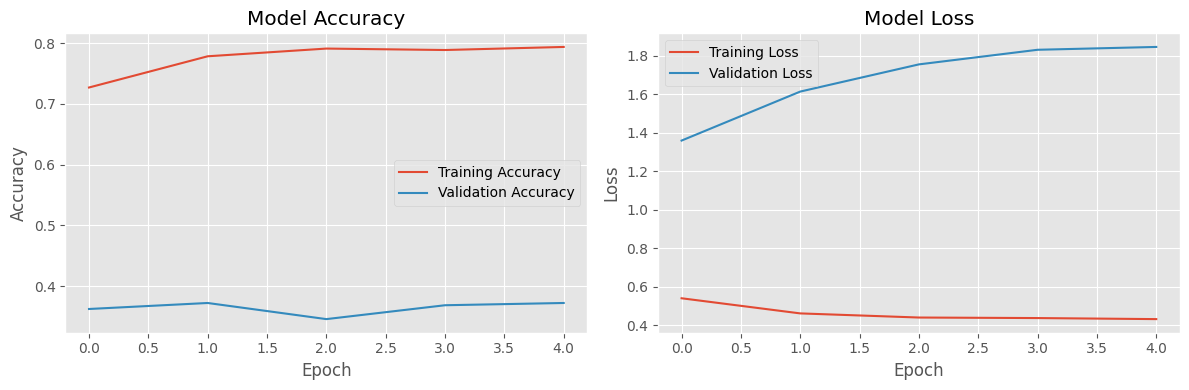

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

4165/4165 ━━━━━━━━━━━━━━━━━━━━ 312s 75ms/step - accuracy: 0.8235 - loss: 0.3935
Test accuracy: 0.8291
Test loss: 0.3966


In [20]:
class_names = test_dataset.class_names
print(class_names)

['Fake', 'Real']


In [21]:
import tensorflow as tf

# Load the test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,  # Replace with your test data directory
    image_size=(224, 224),  # Image size should match the input shape of your model
    batch_size=32,  # Batch size
    shuffle=False  # Ensure the data is not shuffled
)

Found 4165 files belonging to 2 classes.


In [22]:
class_names = test_dataset.class_names
print(class_names)

['Fake', 'Real']


In [23]:
y_pred = model.predict(test_dataset)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1)

131/131 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step


In [24]:
y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())

y_true = tf.convert_to_tensor(y_true)

Confusion Matrix:
[[1728  352]
 [ 360 1725]]


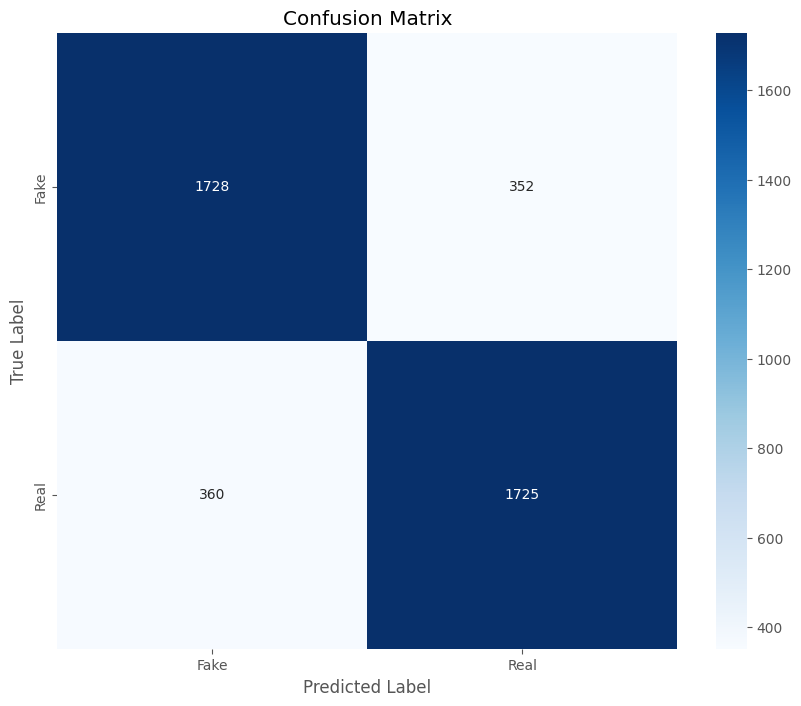

In [25]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
model.save('deepfake.h5')

Found 4165 files belonging to 2 classes.
Class Names: ['Fake', 'Real']
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


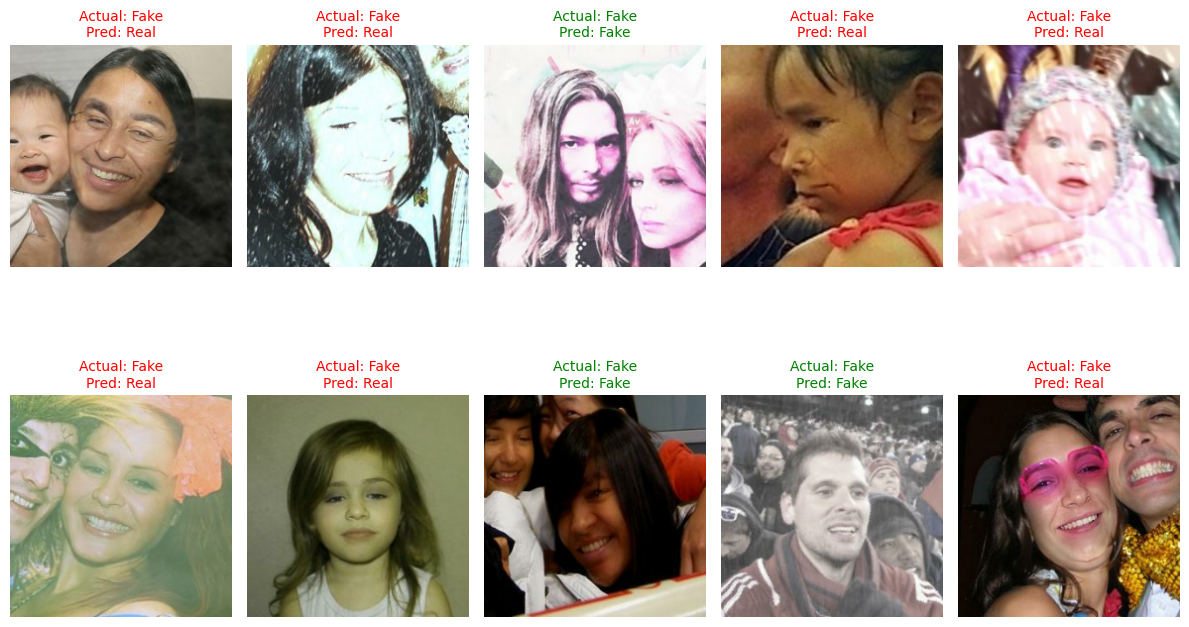

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the trained model
model = tf.keras.models.load_model('deepfake.h5')

# Test dataset path
TESTDATA = 'D:\projects\deepfake detection\Dataset\Test'

# Load the test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TESTDATA,
    image_size=(224, 224),
    batch_size=10,  # Load a small batch for visualization
    shuffle=True
)

# Get class names
class_names = test_dataset.class_names
print("Class Names:", class_names)

# Get a batch of test images and labels
for images, labels in test_dataset.take(1):  # Take only one batch
    y_pred = model.predict(images)  # Get predictions
    y_pred_classes = (y_pred > 0.5).astype(int)  # Convert to class labels
    
    # Plot the images with their predictions
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)  # Arrange in a grid
        plt.imshow(images[i].numpy().astype("uint8"))  # Display image
        plt.axis("off")  # Hide axes
        
        true_label = class_names[np.argmax(labels[i].numpy())]  # Actual label
        pred_label = class_names[y_pred_classes[i][0]]  # Predicted label
        
        # Show the prediction result
        plt.title(f"Actual: {true_label}\nPred: {pred_label}", fontsize=10, color='green' if true_label == pred_label else 'red')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


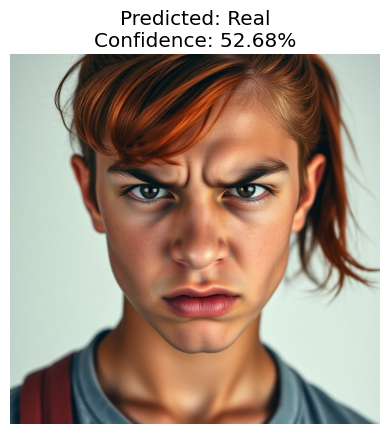


Detailed Prediction Information:
Raw prediction value: 0.5268
Confidence: 52.68%
Predicted class: Fake
True class (from path): Fake


In [32]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define image size (update based on model input size)
IMG_HEIGHT, IMG_WIDTH = 224, 224  

def prepare_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_and_visualize_sample(image_path):
    img_array = prepare_image(image_path)
    prediction = model.predict(img_array)[0][0]  # Get prediction

    # Display Image
    plt.imshow(load_img(image_path))
    plt.axis("off")
    plt.title(f"Predicted: {'Real' if prediction > 0.5 else 'Fake'}\nConfidence: {(prediction if prediction > 0.5 else 1 - prediction):.2%}")
    plt.show()

    # Print Detailed Prediction
    print(f"\nDetailed Prediction Information:")
    print(f"Raw prediction value: {prediction:.4f}")
    print(f"Confidence: {(prediction if prediction > 0.5 else 1 - prediction):.2%}")
    print(f"Predicted class: {'Fake' if prediction > 0.5 else 'Real'}")
    print(f"True class (from path): {'Real' if 'Real' in image_path else 'Fake'}")  # Extracting from path

# Call the function after defining it
image_path = 'Dataset\Test\Fake\\779_20241130171236_A_close-up_shot_of_a_teenager_genderqueer_person_o.jpg'
predict_and_visualize_sample(image_path)


In [29]:
# Train & Validation Accuracy
train_accuracy = history.history['accuracy'][-1]  # Last epoch accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch validation accuracy

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 79.37%
Validation Accuracy: 37.22%
Test Accuracy: 82.91%


In [30]:
model.save_weights('deepfake_mobilenet.weights.h5')